# `pefile` demo

In [1]:
# !pip install pefile==2019.4.18

In [2]:
import pefile
import binascii

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import seaborn as sns

In [4]:
pefile.__version__

'2019.4.18'

In [5]:
!shasum -a 256 ../packer_example/write.exe

e46620bd4eb048fcb2a8f1541d2dbda8299e38e01a4eef9c4e7c3c43b96d0629  ../packer_example/write.exe


### Loading `write.exe`

In [6]:
pe_path = "../packer_example/write.exe"

In [7]:
pe = pefile.PE(pe_path)

If `fast_load` is True, `pefile` will not parse the directories. Only basic headers will be parsed.

In [8]:
dir(pe)

['DIRECTORY_ENTRY_BASERELOC',
 'DIRECTORY_ENTRY_BOUND_IMPORT',
 'DIRECTORY_ENTRY_DEBUG',
 'DIRECTORY_ENTRY_IMPORT',
 'DIRECTORY_ENTRY_RESOURCE',
 'DOS_HEADER',
 'FILE_HEADER',
 'FileAlignment_Warning',
 'FileInfo',
 'NT_HEADERS',
 'OPTIONAL_HEADER',
 'PE_TYPE',
 'RICH_HEADER',
 'SectionAlignment_Warning',
 'VS_FIXEDFILEINFO',
 'VS_VERSIONINFO',
 '_PE__from_file',
 '_PE__warnings',
 '__IMAGE_BASE_RELOCATION_ENTRY_format__',
 '__IMAGE_BASE_RELOCATION_format__',
 '__IMAGE_BOUND_FORWARDER_REF_format__',
 '__IMAGE_BOUND_IMPORT_DESCRIPTOR_format__',
 '__IMAGE_DATA_DIRECTORY_format__',
 '__IMAGE_DEBUG_DIRECTORY_format__',
 '__IMAGE_DELAY_IMPORT_DESCRIPTOR_format__',
 '__IMAGE_DOS_HEADER_format__',
 '__IMAGE_EXPORT_DIRECTORY_format__',
 '__IMAGE_FILE_HEADER_format__',
 '__IMAGE_IMPORT_DESCRIPTOR_format__',
 '__IMAGE_LOAD_CONFIG_DIRECTORY64_format__',
 '__IMAGE_LOAD_CONFIG_DIRECTORY_format__',
 '__IMAGE_NT_HEADERS_format__',
 '__IMAGE_OPTIONAL_HEADER64_format__',
 '__IMAGE_OPTIONAL_HEADER_forma

### Print the PE headers

In [9]:
pe.print_info()

----------DOS_HEADER----------

[IMAGE_DOS_HEADER]
0x0        0x0   e_magic:                       0x5A4D    
0x2        0x2   e_cblp:                        0x90      
0x4        0x4   e_cp:                          0x3       
0x6        0x6   e_crlc:                        0x0       
0x8        0x8   e_cparhdr:                     0x4       
0xA        0xA   e_minalloc:                    0x0       
0xC        0xC   e_maxalloc:                    0xFFFF    
0xE        0xE   e_ss:                          0x0       
0x10       0x10  e_sp:                          0xB8      
0x12       0x12  e_csum:                        0x0       
0x14       0x14  e_ip:                          0x0       
0x16       0x16  e_cs:                          0x0       
0x18       0x18  e_lfarlc:                      0x40      
0x1A       0x1A  e_ovno:                        0x0       
0x1C       0x1C  e_res:                         
0x24       0x24  e_oemid:                       0x0       
0x26       0x26

In [10]:
pe.DOS_HEADER.dump_dict()

{'Structure': 'IMAGE_DOS_HEADER',
 'e_magic': {'FileOffset': 0, 'Offset': 0, 'Value': 23117},
 'e_cblp': {'FileOffset': 2, 'Offset': 2, 'Value': 144},
 'e_cp': {'FileOffset': 4, 'Offset': 4, 'Value': 3},
 'e_crlc': {'FileOffset': 6, 'Offset': 6, 'Value': 0},
 'e_cparhdr': {'FileOffset': 8, 'Offset': 8, 'Value': 4},
 'e_minalloc': {'FileOffset': 10, 'Offset': 10, 'Value': 0},
 'e_maxalloc': {'FileOffset': 12, 'Offset': 12, 'Value': 65535},
 'e_ss': {'FileOffset': 14, 'Offset': 14, 'Value': 0},
 'e_sp': {'FileOffset': 16, 'Offset': 16, 'Value': 184},
 'e_csum': {'FileOffset': 18, 'Offset': 18, 'Value': 0},
 'e_ip': {'FileOffset': 20, 'Offset': 20, 'Value': 0},
 'e_cs': {'FileOffset': 22, 'Offset': 22, 'Value': 0},
 'e_lfarlc': {'FileOffset': 24, 'Offset': 24, 'Value': 64},
 'e_ovno': {'FileOffset': 26, 'Offset': 26, 'Value': 0},
 'e_res': {'FileOffset': 28,
  'Offset': 28,
  'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'},
 'e_oemid': {'FileOffset': 36, 'Offset': 36, 'Value': 0},
 '

#### DOS Header

Get the offset of the beginning of the PE / NT header

In [11]:
pe.DOS_HEADER.e_lfanew

224

#### PE Header

In [12]:
with open(pe_path, "rb") as f_in:
    f_in.seek(224,  0)

    # Read 4 bytes at offset 224
    print(f_in.read(4))

b'PE\x00\x00'


In [13]:
pe.NT_HEADERS.dump_dict()

{'Structure': 'IMAGE_NT_HEADERS',
 'Signature': {'FileOffset': 224, 'Offset': 0, 'Value': 17744}}

### File entropy

In [14]:
name_list = list()
entropy_list = list()

for section in pe.sections:
    print(section.Name)
    print(section.Name.decode())
    name_list.append(section.Name.decode())
    print(section.get_entropy())
    entropy_list.append(section.get_entropy())

b'.text\x00\x00\x00'
.text   
5.628278408859956
b'.data\x00\x00\x00'
.data   
0.41910331703210524
b'.pdata\x00\x00'
.pdata  
1.4429701827001036
b'.rsrc\x00\x00\x00'
.rsrc   
4.620038574863405
b'.reloc\x00\x00'
.reloc  
0.22167620545804623


/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0, flags=flags)


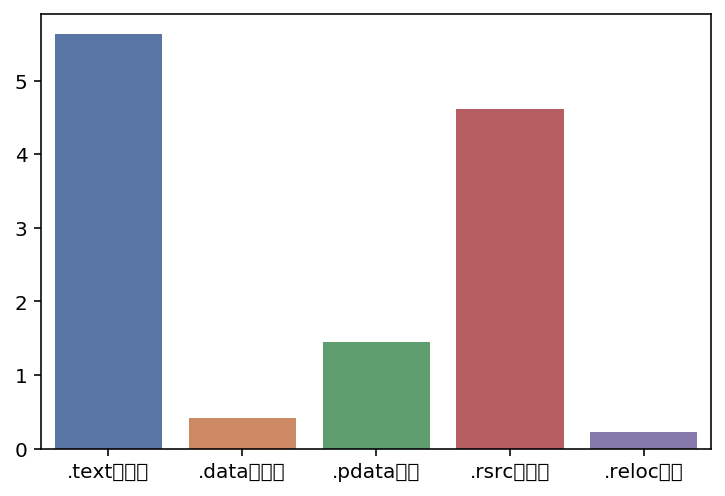

In [15]:
sns.barplot(x=name_list, y=entropy_list, palette="deep")

### Rich Header

In [16]:
pe.RICH_HEADER.raw_data

b":\x88\xc0\x1c~\xe9\xaeO~\xe9\xaeO~\xe9\xaeOw\x91*O\x7f\xe9\xaeOw\x91;O\x7f\xe9\xaeO~\xe9\xafO]\xe9\xaeOw\x91=Oy\xe9\xaeOw\x91-On\xe9\xaeOw\x91'O\x7f\xe9\xaeOw\x91:O\x7f\xe9\xaeOw\x91?O\x7f\xe9\xaeO"

### Imphash

In [17]:
pe.get_imphash()

'8ae4743c15eb8e9b302a857e3ce73d5e'

From /anaconda3/lib/python3.7/site-packages/pefile.py

```python
def get_imphash(self):
    impstrs = []
    exts = ['ocx', 'sys', 'dll']
    if not hasattr(self, "DIRECTORY_ENTRY_IMPORT"):
        return ""
    for entry in self.DIRECTORY_ENTRY_IMPORT:
        if isinstance(entry.dll, bytes):
            libname = entry.dll.decode().lower()
        else:
            libname = entry.dll.lower()
        parts = libname.rsplit('.', 1)

        if len(parts) > 1 and parts[1] in exts:
            libname = parts[0]

        for imp in entry.imports:
            funcname = None
            if not imp.name:
                funcname = ordlookup.ordLookup(entry.dll.lower(), imp.ordinal, make_name=True)
                if not funcname:
                    raise Exception("Unable to look up ordinal %s:%04x" % (entry.dll, imp.ordinal))
            else:
                funcname = imp.name

            if not funcname:
                continue

            if isinstance(funcname, bytes):
                funcname = funcname.decode()
            impstrs.append('%s.%s' % (libname.lower(),funcname.lower()))

    return md5( ','.join( impstrs ).encode() ).hexdigest()
```

### Let's copy the code and use it to print the imported functions

In [19]:
impstrs = []
exts = ['ocx', 'sys', 'dll']
if hasattr(pe, "DIRECTORY_ENTRY_IMPORT"):
    for entry in pe.DIRECTORY_ENTRY_IMPORT:
        if isinstance(entry.dll, bytes):
            libname = entry.dll.decode().lower()
        else:
            libname = entry.dll.lower()
        parts = libname.rsplit('.', 1)

        if len(parts) > 1 and parts[1] in exts:
            libname = parts[0]

        for imp in entry.imports:
            funcname = None
            if not imp.name:
                funcname = ordlookup.ordLookup(entry.dll.lower(), imp.ordinal, make_name=True)
                if not funcname:
                    raise Exception("Unable to look up ordinal %s:%04x" % (entry.dll, imp.ordinal))
            else:
                funcname = imp.name

            if not funcname:
                continue

            if isinstance(funcname, bytes):
                funcname = funcname.decode()

            print(libname.lower(), funcname.lower())

shell32 shellexecutew
kernel32 rtlcapturecontext
kernel32 setunhandledexceptionfilter
kernel32 getstartupinfow
kernel32 heapsetinformation
kernel32 rtllookupfunctionentry
kernel32 rtlvirtualunwind
kernel32 unhandledexceptionfilter
kernel32 getcurrentprocess
kernel32 terminateprocess
kernel32 getsystemtimeasfiletime
kernel32 getcurrentprocessid
kernel32 getcurrentthreadid
kernel32 gettickcount
kernel32 queryperformancecounter
kernel32 getmodulehandlew
kernel32 sleep
msvcrt ?terminate@@yaxxz
msvcrt __set_app_type
msvcrt _fmode
msvcrt _commode
msvcrt __setusermatherr
msvcrt _amsg_exit
msvcrt _initterm
msvcrt _wcmdln
msvcrt exit
msvcrt _cexit
msvcrt _exit
msvcrt _xcptfilter
msvcrt __c_specific_handler
msvcrt __wgetmainargs


### Packers

In [20]:
pe_path = "../packer_example/write.exe"
pe = pefile.PE(pe_path)

In [21]:
pe.OPTIONAL_HEADER.AddressOfEntryPoint

5540

In [22]:
print("%-10s %20s %20s %20s %20s" % ("Name", "Entropy", "SizeOfRawData", "VirtualSize", "VirtualAddress"))
for section in pe.sections:
    print("%-10s %20f %20d %20d %20d" % (section.Name.decode().replace("\x00", ""),
                                         section.get_entropy(),
                                         section.SizeOfRawData,
                                         section.Misc_VirtualSize,
                                         section.VirtualAddress))

Name                    Entropy        SizeOfRawData          VirtualSize       VirtualAddress
.text                  5.628278                 4096                 3780                 4096
.data                  0.419103                  512                 1784                 8192
.pdata                 1.442970                  512                  168                12288
.rsrc                  4.620039                 3584                 3496                16384
.reloc                 0.221676                  512                   56                20480


In [23]:
pe_packed_path = "../packer_example/write_packed.exe"
pe_packed = pefile.PE(pe_packed_path)

In [24]:
pe_packed.OPTIONAL_HEADER.AddressOfEntryPoint

31648

In [25]:
print("%-10s %20s %20s %20s %20s" % ("Name", "Entropy", "SizeOfRawData", "VirtualSize", "VirtualAddress"))
for section in pe_packed.sections:
    print("%-10s %20f %20d %20d %20d" % (section.Name.decode().replace("\x00", ""),
                                         section.get_entropy(),
                                         section.SizeOfRawData,
                                         section.Misc_VirtualSize,
                                         section.VirtualAddress))

Name                    Entropy        SizeOfRawData          VirtualSize       VirtualAddress
UPX0                   0.000000                    0                24576                 4096
UPX1                   7.265725                 3584                 4096                28672
.rsrc                  4.438244                 4096                 4096                32768


In [26]:
print(pe.get_imphash())
print(pe_packed.get_imphash())

8ae4743c15eb8e9b302a857e3ce73d5e
da1acc8b5b8903006a08949734f9ed73
